**Assignment 3 CSCN8000 Artificial Intelligence Algorithms and Mathematics**

Use iris flower dataset from sklearn library and try to form clusters of flowers using petal width and length features. Drop the other two features for simplicity.

Figure out if any preprocessing such as scaling would help here

Draw elbow plot and from that figure out optimal value of k

Use the heart dataset from the Resources Folder or access it from */https://www.kaggle.com/fedesoriano/heart-failure-prediction*/

Load heart disease dataset in pandas dataframe

Remove outliers using Z score. Usual guideline is to remove anything that has Z score > 3 formula or Z score < -3

Convert text columns to numbers using label encoding / one hot encoding

Apply scaling

Build a classification model using various methods (SVM, logistic regression, random forest) and check which model gives you the best accuracy

Now use PCA to reduce dimensions, retrain your model and see its impact on your model in terms of accuracy.

Notes: This lab should be submitted as a notebook and an HTML. Follow */https://docs.github.com/en/pages/quickstart./*

**Name:** Hari Prasath Jaikrishnan       
**Student ID:** 8901541

In [25]:
# Import necessary libraries
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [26]:
# Load iris dataset and keep only petal features
iris_data_X, iris_data_y = load_iris(return_X_y=True, as_frame=True)
iris_data_X = iris_data_X.drop(['sepal length (cm)', 'sepal width (cm)'], axis=1)
iris_data_X.describe()

,petal length (cm),petal width (cm)
count,150.000000,150.000000
mean,3.758000,1.199333
std,1.765298,0.762238
min,1.000000,0.100000
25%,1.600000,0.300000
50%,4.350000,1.300000
75%,5.100000,1.800000
max,6.900000,2.500000


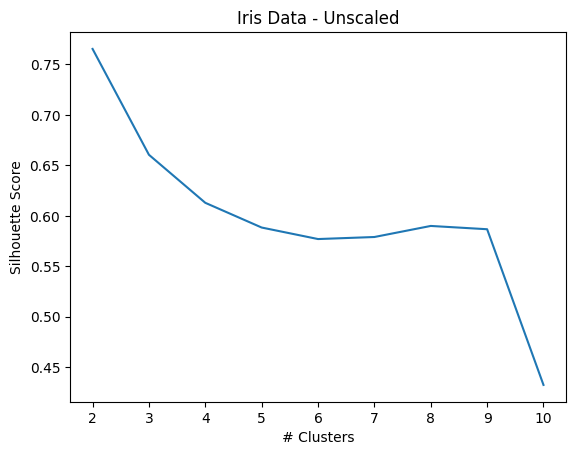

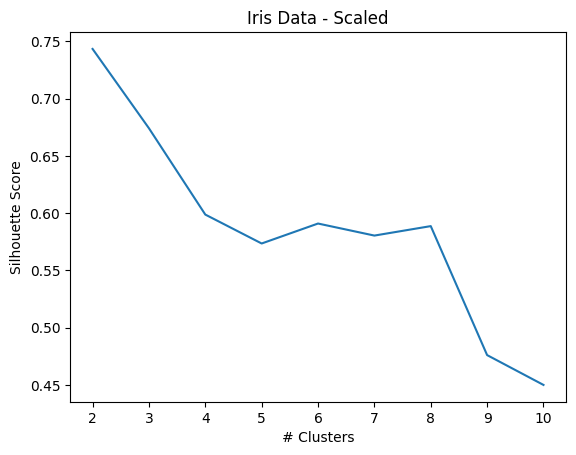

In [27]:
# Scale iris data
iris_scaler = StandardScaler()
iris_scaled_X = iris_scaler.fit_transform(iris_data_X)

# Function to plot silhouette scores
def plot_silhouette(data, title):
    silhouette_scores = {}
    k_range = range(2, 11)

    for k in k_range:
        kmeans = KMeans(n_clusters=k)
        kmeans.fit(data)
        silhouette_scores[k] = silhouette_score(data, kmeans.labels_)

    plt.plot(list(silhouette_scores.keys()), list(silhouette_scores.values()))
    plt.xlabel('# Clusters')
    plt.ylabel('Silhouette Score')
    plt.title(title)
    plt.show()
    return silhouette_scores

# Plot silhouette scores for unscaled iris data
silhouette = plot_silhouette(iris_data_X, 'Iris Data - Unscaled')

# Plot silhouette scores for scaled iris data
silhouette_scaled = plot_silhouette(iris_scaled_X, 'Iris Data - Scaled')

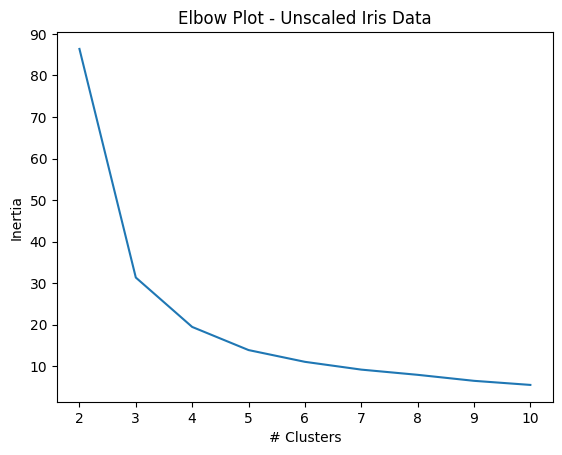

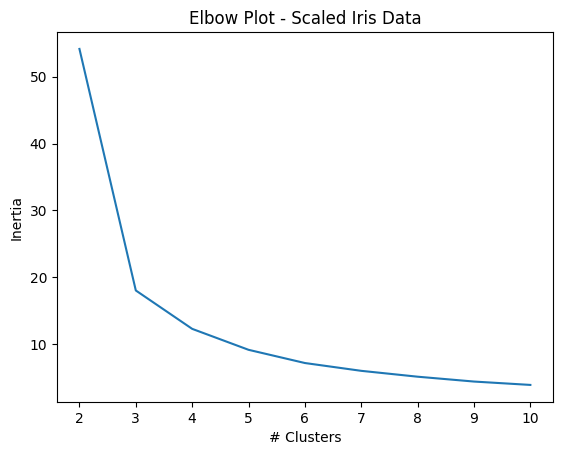

In [28]:
# Function to plot elbow plot
def plot_elbow(data, title):
    inertia_values = []
    k_range = range(2, 11)

    for k in k_range:
        kmeans = KMeans(n_clusters=k)
        kmeans.fit(data)
        inertia_values.append(kmeans.inertia_)

    plt.plot(k_range, inertia_values)
    plt.xlabel('# Clusters')
    plt.ylabel('Inertia')
    plt.title(title)
    plt.show()

# Plot elbow plots for both unscaled and scaled iris data
plot_elbow(iris_data_X, 'Elbow Plot - Unscaled Iris Data')
plot_elbow(iris_scaled_X, 'Elbow Plot - Scaled Iris Data')

In [29]:
# Load heart disease dataset
heart_data_csv = '../8901541/DataSets/heart.csv'  # Update the path
heart_df = pd.read_csv(heart_data_csv)
heart_df.head()


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [30]:

# Function to remove outliers using Z score
def remove_outliers(data, threshold=3, skip_cols=[]):
    num_removed = {}

    for col in data.columns:
        if col in skip_cols:
            continue

        mean = np.mean(data[col])
        std = np.std(data[col])
        z_scores = np.abs((data[col] - mean) / std)

        outliers = (z_scores > threshold) | (z_scores < -threshold)

        num_outliers_removed = np.sum(outliers)
        num_removed[col] = num_outliers_removed

        data = data[~outliers]

    data.reset_index(drop=True, inplace=True)
    print("Number of removed outliers:", num_removed)
    return data

# Function to label encode columns
def encode_labels(data, cols_to_encode):
    encoded_data = data.copy()
    label_encoder = LabelEncoder()
    
    for col in cols_to_encode:
        encoded_data[col] = label_encoder.fit_transform(data[col])
    
    return encoded_data

# Remove outliers from heart dataset and encode categorical columns
binary_cols = ['Sex', 'ChestPainType', 'FastingBS', 'RestingECG', 'ExerciseAngina', 'ST_Slope', 'HeartDisease']
filtered_heart_df = remove_outliers(heart_df, skip_cols=binary_cols)
encoded_heart_df = encode_labels(filtered_heart_df, binary_cols)



Number of removed outliers: {'Age': 0, 'RestingBP': 8, 'Cholesterol': 3, 'MaxHR': 1, 'Oldpeak': 7}


In [31]:
# Apply scaling to encoded heart data
def scale_data(data, skip_cols=[]):
    ret_data = data.copy()
    cols_to_scale = [col for col in ret_data.columns if col not in skip_cols]
    
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(ret_data[cols_to_scale])
    
    ret_data[cols_to_scale] = scaled_data
    return ret_data

scaled_heart_df = scale_data(encoded_heart_df, binary_cols)
scaled_heart_df.head(10)



,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,-1.428154,1,1,0.465900,0.849636,0,1,1.384320,0,-0.855469,2,0
1,-0.475855,0,2,1.634714,-0.168122,0,1,0.752973,0,0.137516,1,1
2,-1.745588,1,1,-0.118507,0.793612,0,2,-1.535661,0,-0.855469,2,0
3,-0.581666,0,0,0.349019,0.149344,0,1,-1.141069,1,0.634008,1,1
4,0.053200,1,2,1.050307,-0.028064,0,1,-0.588640,0,-0.855469,2,0
5,-1.533965,1,2,-0.702913,1.316497,0,1,1.305402,0,-0.855469,2,0
6,-0.899099,0,1,-0.118507,0.364100,0,1,1.305402,0,-0.855469,2,0
7,0.053200,1,1,-1.287320,0.093320,0,1,0.200544,0,-0.855469,2,0
8,-1.745588,1,0,0.465900,0.083983,0,1,-0.272966,1,0.634008,1,1
9,-0.581666,0,1,-0.702913,0.802950,0,1,-0.667558,0,-0.855469,2,0


In [32]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(scaled_heart_df.drop('HeartDisease', axis=1), scaled_heart_df['HeartDisease'], test_size=0.2)

# Evaluate models with different algorithms
models = [
    SVC(),
    LogisticRegression(max_iter=1000),
    RandomForestClassifier()
]

for model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{type(model).__name__} - Accuracy: {accuracy:.4f}")

SVC - Accuracy: 0.8444
LogisticRegression - Accuracy: 0.8611
RandomForestClassifier - Accuracy: 0.8500


In [33]:
# Function to get PCA-transformed data
def get_pca(data, threshold=0.95):
    X = data.drop('HeartDisease', axis=1)
    y = data['HeartDisease']
    pca = PCA()
    transformed_data = pca.fit_transform(X)
    
    explained_variance = np.cumsum(pca.explained_variance_ratio_)
    n_components = np.argmax(explained_variance >= threshold) + 1
    
    pca = PCA(n_components=n_components)
    transformed_data = pca.fit_transform(X)
    
    transformed_df = pd.DataFrame(transformed_data, columns=[f"comp_{i+1}" for i in range(n_components)])
    transformed_df['HeartDisease'] = y.values
    return transformed_df

# Apply PCA to scaled heart data
heart_pca_df = get_pca(scaled_heart_df)

# Split PCA-transformed data
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(heart_pca_df.drop('HeartDisease', axis=1), heart_pca_df['HeartDisease'], test_size=0.2)


In [34]:
# Evaluate models with PCA-transformed data
for model in models:
    model.fit(X_train_pca, y_train_pca)
    y_pred_pca = model.predict(X_test_pca)
    accuracy_pca = accuracy_score(y_test_pca, y_pred_pca)
    print(f"{type(model).__name__} with PCA - Accuracy: {accuracy_pca:.4f}")

SVC with PCA - Accuracy: 0.8611
LogisticRegression with PCA - Accuracy: 0.8167
RandomForestClassifier with PCA - Accuracy: 0.8278
